Importing the dependencies

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# StandardScaler will be used to standardize the data to a common range
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import accuracy_score

Data Collection and Analysis
PIMA Diabetes Dataset for only Females

In [35]:
# Loading the diabetes dataset to a pandas dataframe
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [36]:
# printing the first 5 rows of dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# number of rows & columns in this dataset
diabetes_dataset.shape


(768, 9)

In [38]:
# getting the statistical measures of the data
diabetes_dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
# Checking the distribution of Target Variable
diabetes_dataset['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

Label 0 : Represents Non Diabetic

Lable 1 : Represents Diabetic


In [40]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [41]:
# Seperating the data and lables
X = diabetes_dataset.drop(columns = 'Outcome', axis=1) # Here I have loaded the data (With all columns except target coulumn)
# axis=1 (If dropping a column), axis=0 (If dropping a row)
Y = diabetes_dataset['Outcome'] # Storing target column in Y variable

In [42]:
# Checking target column is dropped or not
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [43]:
# Print the target column
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [44]:
scaler = StandardScaler()

In [45]:
scaler.fit(X)

StandardScaler()

In [46]:
standardized_data = scaler.transform(X)

In [47]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [48]:
#Now giving the above standardized data to the X
X = standardized_data
Y = diabetes_dataset['Outcome']

In [49]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting the training data and test data

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify=Y, random_state=2)

test_size : How much % of data you want as test data
stratify : We are stratifying based on Y because Y has value either 1 or 0. So, we want our dataset to be splitted in same proportion.
If we dont include stratify than all the diabetes cases my go to X_train and all the non diabetic cases may go to X_test.

In [51]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Why reshaping is required ?
Our model is trained on 768 examples, but in above we are just using 1 datapoint. If we dont reshape the array, the model will expect the 768 values but we are giving just 1 value.
Reshaping will tell the model that we are just going to need the prdiction for only one data point.
Also we are getting variable prediction is in the form of list.


Training the Model

Model 1 : Logistic Regression

In [52]:
model_1 = LogisticRegression()
# training the Logistic Regression Model
model_1.fit(X_train, Y_train)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the training data
# It will predict for all training data and we are storing it in variable
X_train_prediction = model_1.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_lr)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the test data
# It will predict for all test data and we are storing it in variable
X_test_prediction = model_1.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_lr)
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model_1.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Accuracy score of the training data :  0.7850162866449512
Accuracy score of the test data :  0.7597402597402597
[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Model 2 : Support Vector Machine

In [53]:
model_2 = svm.SVC(kernel='linear')
# training the Support Vector Machine Classifier
model_2.fit(X_train, Y_train)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the training data
# It will predict for all training data and we are storing it in variable
X_train_prediction = model_2.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_svm)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the test data
# It will predict for all test data and we are storing it in variable
X_test_prediction = model_2.predict(X_test)
test_data_accuracy_svm = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_svm)
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model_2.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Accuracy score of the training data :  0.7866449511400652
Accuracy score of the test data :  0.7727272727272727
[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Model 3 : Gaussian Naive Bayes

In [54]:
model_3 = GaussianNB()
# training the Gaussian Naive Bayes Model
model_3.fit(X_train, Y_train)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the training data
# It will predict for all training data and we are storing it in variable
X_train_prediction = model_3.predict(X_train)
training_data_accuracy_gnb = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_gnb)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the test data
# It will predict for all test data and we are storing it in variable
X_test_prediction = model_3.predict(X_test)
test_data_accuracy_gnb = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_gnb)
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model_3.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Accuracy score of the training data :  0.755700325732899
Accuracy score of the test data :  0.7727272727272727
[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Model 4 : K-Nearest Neighbour

In [55]:
model_4 = KNeighborsClassifier(n_neighbors=16)
# training the KNN Classifier
model_4.fit(X_train, Y_train)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the training data
# It will predict for all training data and we are storing it in variable
X_train_prediction = model_4.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_knn)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the test data
# It will predict for all test data and we are storing it in variable
X_test_prediction = model_4.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_knn)
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model_4.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


Accuracy score of the training data :  0.7833876221498371
Accuracy score of the test data :  0.7142857142857143
[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Model 5 : Decision Tree

In [56]:
model_5 = tree.DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
# training the Decision Tree Classifier
model_5.fit(X_train, Y_train)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the training data
# It will predict for all training data and we are storing it in variable
X_train_prediction = model_5.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_dt)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the test data
# It will predict for all test data and we are storing it in variable
X_test_prediction = model_5.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_dt)
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model_5.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


Accuracy score of the training data :  0.8420195439739414
Accuracy score of the test data :  0.7857142857142857
[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Model 6 : Random Forest Classifier

In [57]:
model_6 = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
# training the Random Forest Classifier
model_6.fit(X_train, Y_train)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the training data
# It will predict for all training data and we are storing it in variable
X_train_prediction = model_6.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_rf)
# Here we are using trained ML to predict the labels for X-train
# accuracy score on the test data
# It will predict for all test data and we are storing it in variable
X_test_prediction = model_6.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_rf)
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model_6.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


Accuracy score of the training data :  0.8599348534201955
Accuracy score of the test data :  0.7207792207792207
[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','SVM','Naive Bayes','K-Nearest Neighbour','Decision Tree','Random Forest'], 'Training Data Accuracy': [training_data_accuracy_lr*100,
                    training_data_accuracy_svm*100,training_data_accuracy_gnb*100,training_data_accuracy_knn*100,training_data_accuracy_dt*100,
                    training_data_accuracy_rf*100], 'Test Data Accuracy': [test_data_accuracy_lr*100,
                    test_data_accuracy_svm*100,test_data_accuracy_gnb*100,test_data_accuracy_knn*100,test_data_accuracy_dt*100,
                    test_data_accuracy_rf*100]})
model_ev

,Model,Training Data Accuracy,Test Data Accuracy
0,Logistic Regression,78.501629,75.974026
1,SVM,78.664495,77.272727
2,Naive Bayes,75.570033,77.272727
3,K-Nearest Neighbour,78.338762,71.428571
4,Decision Tree,84.201954,78.571429
5,Random Forest,85.993485,72.077922


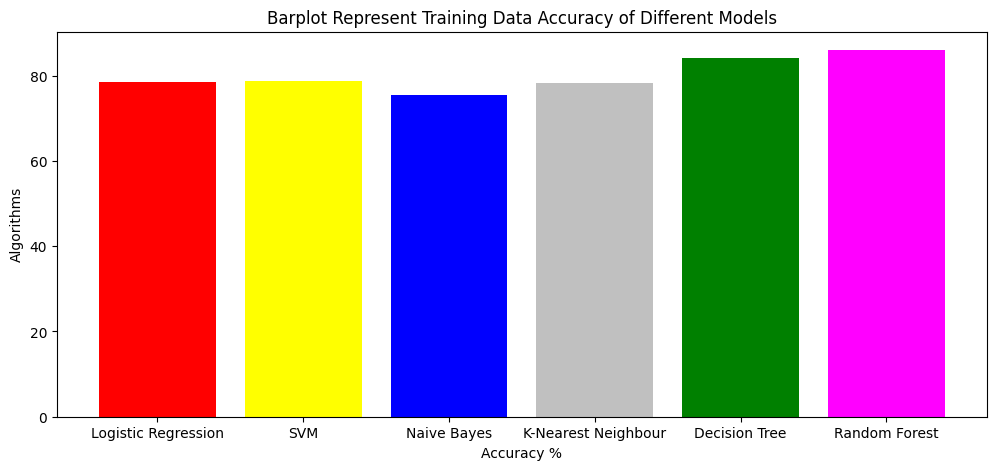

In [59]:
colors = ['red','yellow','blue','silver','green','magenta',]
plt.figure(figsize=(12,5))
plt.title("Barplot Represent Training Data Accuracy of Different Models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Training Data Accuracy'],color = colors)
plt.show()

Applying Ensemble Learning on all Models

In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


# voting classifier
final_model_1= VotingClassifier(
    estimators=[("LR", model_1), ("SVM", model_2), ("GNB", model_3),("KNN", model_4),("DT", model_5),("RF", model_6)],
    voting="hard",
)

# training
final_model_1.fit(X_train, Y_train)

# prediction
prediction = final_model_1.predict(X_test)

# evaluation
accuracy = round(accuracy_score(Y_test, prediction) * 100, 3)
auc = round(roc_auc_score(Y_test, prediction), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")



 Accuracy: 75.974%
 AUC score: 0.7


In [61]:
final_model = VotingClassifier(
    estimators=[("LR", model_1), ("SVM", model_2), ("GNB", model_3),("KNN", model_4),("DT", model_5),("RF", model_6)],
    voting="hard",
)

# training
final_model.fit(X_train, Y_train)

# prediction



input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
print(input_data_reshaped)

prediction = final_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[  4.    110.     92.      0.      0.     37.6     0.191  30.   ]]
[1]
The person is diabetic


Saving the trained model

In [62]:
import pickle  #This library is uesd to save the model

In [63]:
filename = 'trained_model_diabetes.sav'
pickle.dump(final_model, open(filename,'wb')) #We are opening the file and writing the file in binary format, wb = writing in binary format

In [64]:
#Loading the saved model
loaded_model = pickle.load(open('trained_model_diabetes.sav','rb'))# rb = reading in binary format

In [65]:
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic
